In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns

In [2]:
df_predictors = pd.read_csv('blood_bbb.csv')
df_outcomes = pd.read_csv('blood_log.csv')
df_predictors

,Unnamed: 0,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,...,scaa3,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3
0,1,12.030000,1,0,167.06700,0,156.293,76.94749,43.44619,0.00000,...,-0.0093,1,1,0.9241,0.9241,1.0000,0.000000,6.0255,0.000000,0.000000
1,2,49.330002,0,0,92.64243,6,151.165,38.24339,25.52006,0.00000,...,-0.0754,2,2,1.2685,1.0420,1.0000,0.000000,6.5681,32.010201,33.613499
2,3,50.529999,1,0,295.16700,15,366.485,58.05473,124.74020,21.65084,...,-0.0303,1,4,1.2562,1.2562,0.2500,26.973301,10.8567,0.000000,27.545099
3,4,37.389999,0,0,319.11220,15,382.552,62.23933,124.74020,13.19232,...,-0.0240,1,3,1.1962,1.1962,0.3333,21.706499,11.0017,0.000000,15.131600
4,5,37.389999,1,0,299.65800,12,326.464,74.80064,118.04060,33.00190,...,-0.0255,1,3,1.2934,1.2934,0.3333,24.206100,10.8109,0.000000,15.133300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,204,32.700001,1,0,233.69200,6,250.362,51.28292,109.50990,13.19232,...,-0.0416,1,3,0.8717,0.8717,0.3333,0.000000,3.1150,0.000000,49.692799
204,205,3.240000,0,0,343.24290,10,292.446,40.59702,104.67720,13.19232,...,-0.0030,0,1,0.0000,0.0000,0.0000,0.000000,4.6658,0.000000,0.000000
205,206,32.340000,1,0,234.79200,6,261.389,75.11627,86.66676,0.00000,...,-0.0406,1,2,1.2276,1.2276,0.5000,0.000000,16.1765,54.358601,0.000000
206,207,37.299999,0,0,124.25940,0,143.206,63.98079,14.70850,0.00000,...,-0.0561,1,2,0.9082,0.9082,0.5000,0.000000,0.0000,30.101400,15.944600


In [3]:
df_predictors.drop(columns='Unnamed: 0', inplace=True)
df_predictors

,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,peoe_vsa.3,...,scaa3,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3
0,12.030000,1,0,167.06700,0,156.293,76.94749,43.44619,0.00000,0.000000,...,-0.0093,1,1,0.9241,0.9241,1.0000,0.000000,6.0255,0.000000,0.000000
1,49.330002,0,0,92.64243,6,151.165,38.24339,25.52006,0.00000,8.619013,...,-0.0754,2,2,1.2685,1.0420,1.0000,0.000000,6.5681,32.010201,33.613499
2,50.529999,1,0,295.16700,15,366.485,58.05473,124.74020,21.65084,8.619013,...,-0.0303,1,4,1.2562,1.2562,0.2500,26.973301,10.8567,0.000000,27.545099
3,37.389999,0,0,319.11220,15,382.552,62.23933,124.74020,13.19232,21.785640,...,-0.0240,1,3,1.1962,1.1962,0.3333,21.706499,11.0017,0.000000,15.131600
4,37.389999,1,0,299.65800,12,326.464,74.80064,118.04060,33.00190,0.000000,...,-0.0255,1,3,1.2934,1.2934,0.3333,24.206100,10.8109,0.000000,15.133300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,32.700001,1,0,233.69200,6,250.362,51.28292,109.50990,13.19232,0.000000,...,-0.0416,1,3,0.8717,0.8717,0.3333,0.000000,3.1150,0.000000,49.692799
204,3.240000,0,0,343.24290,10,292.446,40.59702,104.67720,13.19232,0.000000,...,-0.0030,0,1,0.0000,0.0000,0.0000,0.000000,4.6658,0.000000,0.000000
205,32.340000,1,0,234.79200,6,261.389,75.11627,86.66676,0.00000,8.619013,...,-0.0406,1,2,1.2276,1.2276,0.5000,0.000000,16.1765,54.358601,0.000000
206,37.299999,0,0,124.25940,0,143.206,63.98079,14.70850,0.00000,0.000000,...,-0.0561,1,2,0.9082,0.9082,0.5000,0.000000,0.0000,30.101400,15.944600


In [4]:
df_outcomes.drop(columns='Unnamed: 0', inplace=True)
df_outcomes

,x
0,1.08
1,-0.40
2,0.22
3,0.14
4,0.69
...,...
203,-0.02
204,0.08
205,0.25
206,-0.84


In [5]:
low_uniqueness = []
for col in df_predictors.columns:
    uniques = len(pd.unique(df_predictors[col]))
    if uniques / df_predictors.shape[0] < 0.1:
        print(f'Unique values in column {col}: {uniques}')
        low_uniqueness.append(col)

Unique values in column nbasic: 2
Unique values in column negative: 2
Unique values in column a_aro: 12
Unique values in column peoe_vsa.4: 16
Unique values in column peoe_vsa.5: 11
Unique values in column peoe_vsa.2.1: 12
Unique values in column peoe_vsa.3.1: 15
Unique values in column peoe_vsa.4.1: 19
Unique values in column peoe_vsa.5.1: 20
Unique values in column a_acc: 7
Unique values in column a_acid: 3
Unique values in column a_base: 6
Unique values in column vsa_acid: 3
Unique values in column vsa_base: 7
Unique values in column vsa_don: 11
Unique values in column vsa_pol: 4
Unique values in column slogp_vsa6: 11
Unique values in column frac.anion7.: 12
Unique values in column rotatablebonds: 14
Unique values in column nocount: 10
Unique values in column hbdnr: 7
Unique values in column rule.of.5violations: 4
Unique values in column alert: 2
Unique values in column prx: 11
Unique values in column ub: 13
Unique values in column pol: 5
Unique values in column inthb: 2
Unique valu

In [6]:
frequency_threshold = 0.2
for col in low_uniqueness:
    column = df_predictors[col]
    unique_vals = pd.unique(column)

    unique_occurances = []
    for u_val in unique_vals:
        unique_occurances.append(np.sum(column == u_val))
    two_most_idx = np.argsort(unique_occurances)[-2:]
    ratio = unique_occurances[two_most_idx[1]] / unique_occurances[two_most_idx[0]]
    if ratio < frequency_threshold:
        print(f'The ratio of frequencies is to small for {col}. Ratio = {ratio}')
else:
    print('All of the predictors have sufficient ratio between occurances of the two most common values')

All of the predictors have sufficient ratio between occurances of the two most common values


In [7]:
corrs = df_predictors.corr()
corrs

,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,peoe_vsa.3,...,scaa3,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3
tpsa,1.000000,-0.038248,0.034638,-0.099540,-0.062688,0.259042,0.256643,-0.255632,0.232384,0.555364,...,-0.651955,0.622146,0.738856,0.430102,0.364792,0.053922,0.403754,0.381005,0.505645,0.263286
nbasic,-0.038248,1.000000,0.091600,0.134451,-0.003533,0.115821,0.097290,0.149900,-0.122966,0.195654,...,0.200121,0.133865,-0.069410,0.165719,0.149688,0.263280,-0.040264,0.227104,-0.211946,-0.031183
negative,0.034638,0.091600,1.000000,-0.038976,-0.053271,-0.015825,-0.010128,0.029759,-0.048380,-0.052665,...,-0.028441,-0.026904,0.091180,0.000773,0.007297,-0.045307,-0.047296,-0.066910,0.056133,-0.000417
vsa_hyd,-0.099540,0.134451,-0.038976,1.000000,0.668255,0.888697,0.473163,0.756697,0.441802,-0.169739,...,0.555448,-0.098145,0.309105,-0.229148,-0.225459,-0.347858,-0.191412,-0.227162,-0.215911,0.144673
a_aro,-0.062688,-0.003533,-0.053271,0.668255,1.000000,0.646561,0.143348,0.568358,0.359456,-0.113900,...,0.427615,-0.046347,0.203404,-0.185345,-0.179686,-0.192680,0.152434,-0.062589,-0.275595,0.023785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rdta,0.053922,0.263280,-0.045307,-0.347858,-0.192680,-0.262517,-0.362152,-0.425033,-0.209672,0.464480,...,0.083096,0.633080,-0.426753,0.667906,0.646061,1.000000,-0.036030,0.516969,-0.253526,-0.171789
n_sp2,0.403754,-0.040264,-0.047296,-0.191412,0.152434,-0.017720,-0.015081,-0.227102,0.252356,0.307199,...,-0.288973,0.104032,0.291570,0.003449,-0.026000,-0.036030,1.000000,0.172582,-0.135127,-0.023109
n_sp3,0.381005,0.227104,-0.066910,-0.227162,-0.062589,-0.124874,-0.067081,-0.125982,-0.111129,0.577189,...,-0.177493,0.672124,-0.050795,0.471297,0.417218,0.516969,0.172582,1.000000,-0.082550,-0.145970
o_sp2,0.505645,-0.211946,0.056133,-0.215911,-0.275595,-0.011983,0.231082,-0.293439,-0.082698,0.136589,...,-0.660104,-0.017305,0.363706,0.100707,0.099393,-0.253526,-0.135127,-0.082550,1.000000,-0.105587


<AxesSubplot:>

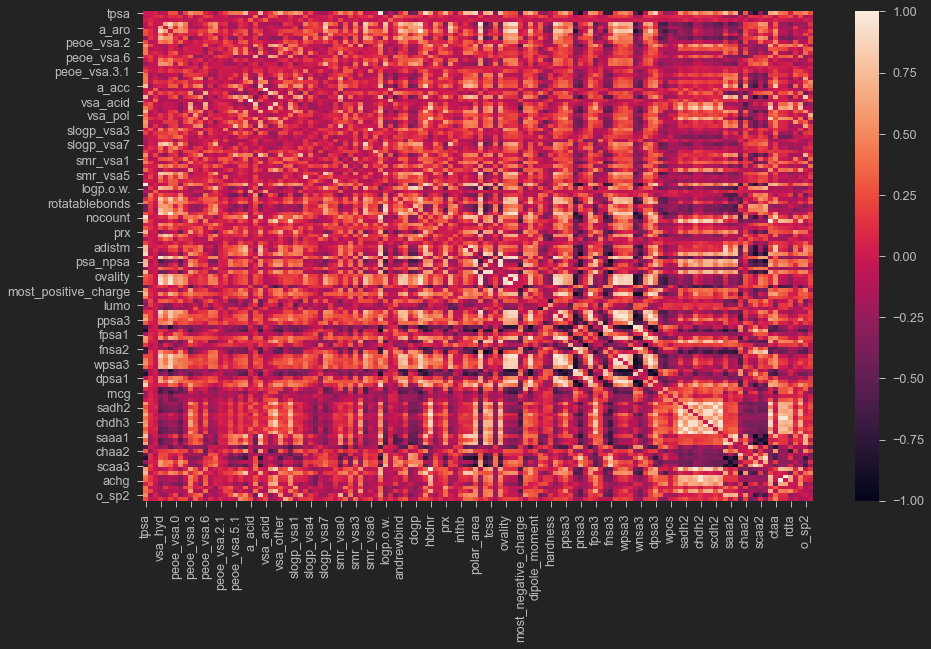

In [8]:
# Change the diagonal to 0, to avoid issues.
np.fill_diagonal(corrs.values, 0)
sns.heatmap(corrs)

### Algorithm for removing predictors based on correlation

In [10]:
removed_predictors = []
correlation_threshold = 0.7
# Take absolute values of corrs. It is written in APM, but only for the maximum pariwise correlation, not for calculating the average.
# I am assuming that it should be absolute values also for the averages.
corrs_abs = corrs.abs()
correlation_vals = corrs_abs.max()
correlation_idxs = corrs_abs.idxmax()

while np.sum(correlation_vals > correlation_threshold):
    correlation_vals = corrs_abs.max()
    correlation_idxs = corrs_abs.idxmax()
    # 1. Find the greatest corr
    greatest_corr_1 = correlation_vals.idxmax()
    # 2. Identify both predictors associated with that corr
    greatest_corr_2 = correlation_idxs[greatest_corr_1]
    # 3. Calculate average correlations for both predictors
    avg_corr_1 = np.mean(corrs_abs[greatest_corr_1])
    avg_corr_2 = np.mean(corrs_abs[greatest_corr_2])
    # 4. Delete predictor with greater average corr.
    if avg_corr_1 > avg_corr_2:
        predictor_to_drop = greatest_corr_1
    else:
        predictor_to_drop = greatest_corr_2
    removed_predictors.append(predictor_to_drop)
    corrs_abs.drop(columns=predictor_to_drop, index=predictor_to_drop, inplace=True)
print(f'Deleted {len(removed_predictors)} predictors with a correlation threshold {correlation_threshold}')
        

Deleted 74 predictors with a correlation threshold 0.7


In [11]:
corrs_abs

,nbasic,negative,peoe_vsa.0,peoe_vsa.2,peoe_vsa.3,peoe_vsa.4,peoe_vsa.5,peoe_vsa.6,peoe_vsa.0.1,peoe_vsa.1.1,...,rncg,wpcs,wncs,chaa2,chaa3,scaa2,achg,n_sp2,n_sp3,o_sp3
nbasic,0.000000e+00,0.091600,0.097290,0.122966,0.195654,0.124595,0.002613,0.187732,0.169143,0.041894,...,0.062362,0.066020,0.081580,0.249485,0.136965,0.061153,0.149688,0.040264,0.227104,0.031183
negative,9.159990e-02,0.000000,0.010128,0.048380,0.052665,0.043770,0.105471,0.042969,0.048684,0.031964,...,0.065392,0.019710,0.013133,0.015772,0.131090,0.036165,0.007297,0.047296,0.066910,0.000417
peoe_vsa.0,9.729031e-02,0.010128,0.000000,0.090764,0.046058,0.006304,0.305977,0.049833,0.209108,0.053421,...,0.484978,0.178849,0.400465,0.327966,0.000828,0.158493,0.134647,0.015081,0.067081,0.049353
peoe_vsa.2,1.229664e-01,0.048380,0.090764,0.000000,0.062404,0.075447,0.002925,0.119905,0.082268,0.110628,...,0.382755,0.164515,0.143125,0.225533,0.205564,0.349229,0.042662,0.252356,0.111129,0.241779
peoe_vsa.3,1.956543e-01,0.052665,0.046058,0.062404,0.000000,0.002360,0.023726,0.345350,0.035804,0.183423,...,0.061767,0.151736,0.025791,0.191429,0.174853,0.268243,0.433252,0.307199,0.577189,0.179236
peoe_vsa.4,1.245947e-01,0.043770,0.006304,0.075447,0.002360,0.000000,0.002903,0.263713,0.036757,0.031635,...,0.105885,0.129697,0.102473,0.169082,0.219378,0.201609,0.214342,0.010141,0.078849,0.350023
peoe_vsa.5,2.613359e-03,0.105471,0.305977,0.002925,0.023726,0.002903,0.000000,0.224288,0.127932,0.187839,...,0.280918,0.158817,0.174417,0.297160,0.215399,0.017748,0.133999,0.102921,0.132309,0.071411
peoe_vsa.6,1.877319e-01,0.042969,0.049833,0.119905,0.345350,0.263713,0.224288,0.000000,0.137923,0.109425,...,0.000943,0.149169,0.010560,0.456696,0.300746,0.171728,0.298166,0.069706,0.390337,0.160547
peoe_vsa.0.1,1.691434e-01,0.048684,0.209108,0.082268,0.035804,0.036757,0.127932,0.137923,0.000000,0.091523,...,0.212345,0.141955,0.215303,0.084757,0.284997,0.238648,0.141730,0.007077,0.180563,0.094925
peoe_vsa.1.1,4.189403e-02,0.031964,0.053421,0.110628,0.183423,0.031635,0.187839,0.109425,0.091523,0.000000,...,0.254024,0.228439,0.122849,0.107505,0.274215,0.312733,0.010892,0.308734,0.185145,0.062943


In [12]:
corrs.drop(columns=removed_predictors, index=removed_predictors, inplace=True)

<AxesSubplot:>

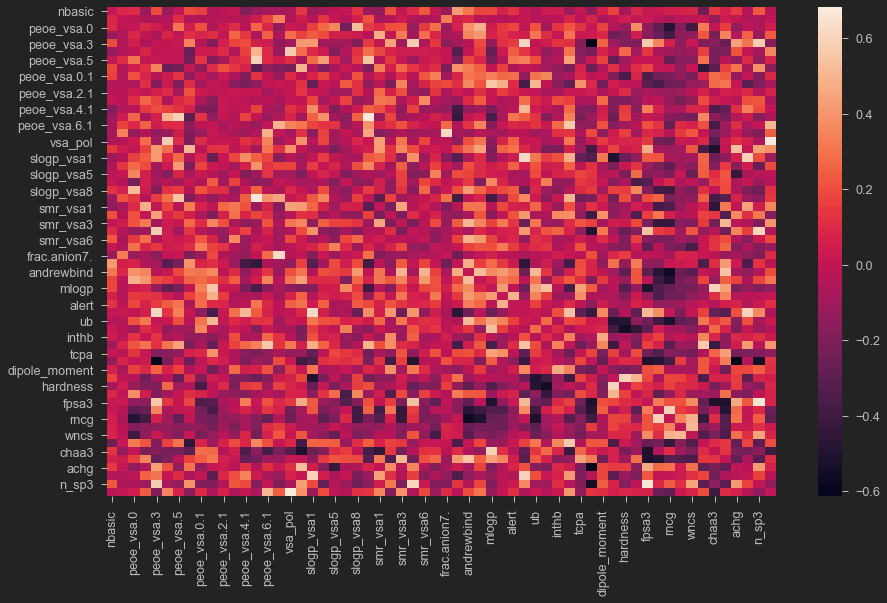

In [13]:
sns.heatmap(corrs)